In [545]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR
from sklearn.tree import plot_tree


from scipy.spatial.distance import pdist, squareform
from sklearn.metrics.pairwise import paired_distances
from sklearn.metrics.pairwise import euclidean_distances

# FUNÇÕES

In [20]:
def rmse_modelo(modelo, prediction,X_train, y_test, y_train):
    treino = np.sqrt(mean_squared_error(y_train, modelo.predict(X_train)))
    teste = np.sqrt(mean_squared_error(y_test, prediction))
    score_modelo = modelo.score(X_test, y_test)
    print('Erro treino: ', treino)
    print('Erro teste: ', teste)
    print('Score: ', score_modelo)


In [186]:
def separa_bairro(row):
    try:
        row = row.split('-')[1]
        row = row.split(',')[0]
        return row.strip()
    except:
        pass

In [181]:
def yes_no_category(row):
    if row > 50:
        return 1
    else:
        return 0

In [182]:
def yes_no_category1(row):
    if row > 1:
        return 1
    else:
        return 0

# TRATANDO VARIAVEIS

## CARREGANDO DATASET

In [327]:
df_google = pd.read_csv('data/df_google_final.csv')
df_google2 = pd.read_csv('data/df_google_final2.csv')

In [330]:
df_google = pd.concat([df_google, df_google2]).reset_index(drop=True).drop_duplicates()

In [189]:
df_quinto = pd.read_csv('data/df_quinto_empresas_google.csv')

In [285]:
df_loft = pd.read_csv('data/df_loft_google.csv')

## CLEANING

### LOFT 

In [286]:
df_loft

,tipo_imovel,logradouro,bairro,numero,metragem,quartos,vaga,preco_total,longitude,latitude,...,lugares_comercio,lugares_cultura,lugares_saude,lugares_educacao,lugares_religiosos,lugares_parques,lugares_estadios,lugares_turismo,lugares_metro_trem,lugares_transporte
0,apartamento,Paes de Barros,Mooca,81,130,3,2,600000.0,-46.587414,-23.569936,...,14.0,1.0,13.0,3.0,30.0,60.0,0.0,0.0,0.0,0.0
1,apartamento,Guarará,Jardim Paulista,75,130,3,1,0.0,-46.657526,-23.573576,...,131.0,144.0,67.0,1.0,32.0,2.0,160.0,3.0,0.0,0.0
2,apartamento,Veiga Filho,Higienópolis,122,43,1,0,440000.0,-46.659709,-23.540198,...,80.0,157.0,59.0,76.0,63.0,161.0,84.0,0.0,166.0,0.0
3,apartamento,Jacaré-Copaíba,Freguesia do Ó,62,66,3,1,300000.0,-46.702246,-23.483577,...,1.0,0.0,0.0,6.0,13.0,2.0,0.0,0.0,0.0,0.0
4,apartamento,Nebulosas,São Mateus,141,46,2,1,266000.0,-46.460146,-23.611818,...,0.0,0.0,0.0,0.0,16.0,2.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2397,apartamento,Maurício Francisco Klabin,Chacara Klabin,161,231,3,4,1865000.0,-46.632258,-23.594701,...,42.0,17.0,43.0,127.0,63.0,59.0,0.0,0.0,307.0,17.0
2398,apartamento,Cardoso de Almeida,Perdizes,24A,114,3,1,980000.0,-46.670499,-23.540307,...,16.0,153.0,38.0,37.0,35.0,70.0,84.0,76.0,0.0,0.0
2399,apartamento,Brasílio Machado,Santa Cecília,62,101,2,1,920000.0,-46.658502,-23.536569,...,85.0,56.0,32.0,93.0,72.0,159.0,0.0,6.0,153.0,0.0
2400,apartamento,Itu,Jardim América,41,172,2,2,0.0,-46.660424,-23.563066,...,366.0,466.0,183.0,91.0,49.0,224.0,0.0,285.0,253.0,96.0


In [287]:
df_loft['lugares_parques'] = df_loft['lugares_parques'].apply(yes_no_category)

In [288]:
df_loft['lugares_metro_trem'] = df_loft['lugares_metro_trem'].apply(yes_no_category1)

In [289]:
df_loft = df_loft.loc[(df_loft['preco_total'] < 10000000) & (df_loft['preco_total'] != 0) ,:]

In [290]:
df_loft.reset_index(inplace=True, drop=True)

### QUINTO ANDAR 

In [190]:
df_quinto.head()

,tipo_imovel,logradouro,bairro,numero,metragem,quartos,banheiros,vaga,preco_total,longitude,...,lugares_comercio,lugares_cultura,lugares_saude,lugares_religiosos,lugares_parques,lugares_estadios,lugares_educacao,lugares_metro_trem,lugares_turismo,lugares_transporte
0,apartamento,Rua Jaguarete,Casa Verde,202.0,56,2,2,1.0,2811,-46.656565,...,12.0,13.0,2.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0
1,apartamento,Rua Jaguarete,Casa Verde,202.0,54,2,2,1.0,4026,-46.656565,...,12.0,13.0,2.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0
2,apartamento,Rua Jaguarete,Casa Verde,202.0,49,2,2,1.0,2992,-46.656565,...,12.0,13.0,2.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0
3,apartamento,Rua Jaguarete,Casa Verde,202.0,56,2,2,1.0,2902,-46.656565,...,12.0,13.0,2.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0
4,apartamento,Rua Jaguarete,Casa Verde,202.0,54,2,2,1.0,2893,-46.656565,...,12.0,13.0,2.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0


In [191]:
df_quinto['lugares_parques'] = df_quinto['lugares_parques'].apply(yes_no_category).sum()
df_quinto['lugares_metro_trem'] = df_quinto['lugares_metro_trem'].apply(yes_no_category1).sum()

# GOOGLE


In [335]:
df_google.head()

,formatted_address,id,name,price_level,rating,types,user_ratings_total,lat,lng,lugares,latitude_utm,longitude_utm
0,"R. Silva Pinto, 379 - Bom Retiro, São Paulo - ...",8bd3aec3c6867c4f89c37431ec487b54419d7b24,Joa Bakery,2.0,4.7,"['bakery', 'restaurant', 'food', 'point_of_int...",102.0,-23.528153,-46.639014,lugares_alimentacao,7397056.35,332676.30
1,"R. dos Italianos, 656 - Bom Retiro, São Paulo ...",b199bb1a82563efe32ea4f2e088b31dbce74b2da,Bishop Breads and Pastries,2.0,4.1,"['bakery', 'food', 'point_of_interest', 'store...",1391.0,-23.524125,-46.643853,lugares_alimentacao,7397496.69,332177.14
2,"Rua Prates, 563 - Bom Retiro, São Paulo - SP, ...",c10640eb63cd571e3ef859597a0b35f979981152,Bellapan Bakery,2.0,4.6,"['bakery', 'cafe', 'food', 'point_of_interest'...",890.0,-23.529061,-46.635881,lugares_alimentacao,7396959.40,332997.38
3,"R. Júlio Conceição, 284 - Bom Retiro, São Paul...",12e77c36ce4cdd0f4af2ccc9049a7cb012943328,Carvalho Family Bakery,2.0,4.0,"['bakery', 'food', 'point_of_interest', 'store...",1076.0,-23.526296,-46.639254,lugares_alimentacao,7397261.69,332649.47
4,"R. Guarani, 117 - Bom Retiro, São Paulo - SP, ...",5be7ee33b7c2e139fcfbd2443ab6ca93807ad5b8,Sweet Pang Bakery,2.0,4.5,"['bakery', 'food', 'point_of_interest', 'store...",139.0,-23.528653,-46.635027,lugares_alimentacao,7397005.64,333084.03


In [337]:
df_google['bairro'] = df_google['formatted_address'].apply(separa_bairro)

# PRIMEIROS TESTES

In [17]:
df.corr().loc['preco_total']

numero                 0.076840
metragem               0.672145
quartos                0.522855
banheiros              0.673481
vaga                   0.513430
preco_total            1.000000
longitude              0.043507
latitude              -0.057595
latitude_utm           0.023082
longitude_utm         -0.100588
latitude_utm.1         0.023082
longitude_utm.1       -0.100588
lugares_alimentacao    0.217866
outros                 0.148810
lugares_servicos       0.129265
lugares_comercio       0.050112
lugares_cultura        0.037278
lugares_saude          0.293354
lugares_religiosos    -0.003373
lugares_parques        0.239115
lugares_estadios       0.196843
lugares_educacao      -0.026879
lugares_metro_trem     0.068414
lugares_turismo       -0.045727
lugares_transporte     0.063811
Name: preco_total, dtype: float64

<Figure size 432x432 with 0 Axes>

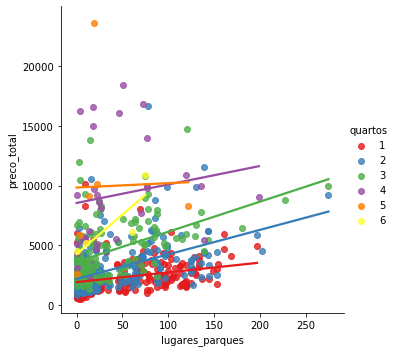

In [18]:
plt.figure(figsize=(6,6))

sns.lmplot('lugares_parques','preco_total',data=df, hue='quartos', ci=False,palette="Set1" )

In [19]:
mask = (df['latitude_utm'] > 1) & (df['longitude_utm'] >1)
df_plot = df.loc[mask,:]

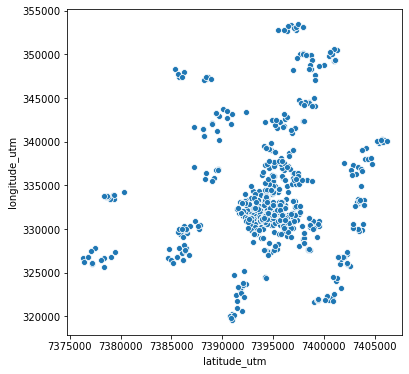

In [20]:
plt.figure(figsize=(6,6))

sns.scatterplot(df_plot['latitude_utm'], df_plot['longitude_utm'], )
plt.show()

# OUTLIERS

In [207]:
df_quinto = df_quinto.loc[(df_quinto['preco_total'] < 8000),:]

# REGRESSÃO LINEAR

## Preço aluguel baseado no apartamento 

In [193]:
df_quinto.columns

Index(['tipo_imovel', 'logradouro', 'bairro', 'numero', 'metragem', 'quartos',
       'banheiros', 'vaga', 'preco_total', 'longitude', 'latitude', 'ruas',
       'latitude_utm', 'longitude_utm', 'latitude_utm.1', 'longitude_utm.1',
       'lugares_alimentacao', 'outros', 'lugares_servicos', 'lugares_comercio',
       'lugares_cultura', 'lugares_saude', 'lugares_religiosos',
       'lugares_parques', 'lugares_estadios', 'lugares_educacao',
       'lugares_metro_trem', 'lugares_turismo', 'lugares_transporte'],
      dtype='object')

In [208]:
X = df_quinto[['metragem','quartos','banheiros','vaga']]
y = df_quinto['preco_total']

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LinearRegression()

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
model.fit(X_train, y_train)


X_test_std = scaler.transform(X_test)
predictions = model.predict(X_test_std)

In [209]:
rmse_modelo(model, predictions, X_train, y_test,y_train )

Erro treino:  1324.560729743784
Erro teste:  1198.9111279549752
Score:  -224.24663287473848


## PLOT 

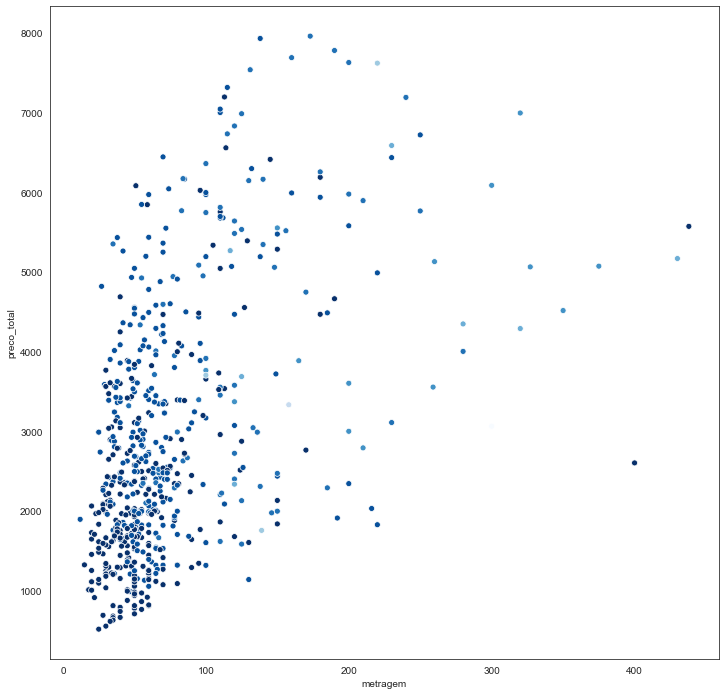

In [210]:
sns.set_style("white")
fig = plt.figure(figsize=(12,12))
sns.scatterplot(df_quinto['metragem'], df_quinto['preco_total'], hue = df_quinto['vaga'], palette='Blues_r', legend=False, markers=False)
fig.savefig("apresentacao/imagens_complementares/plot_metragem_preco.png")

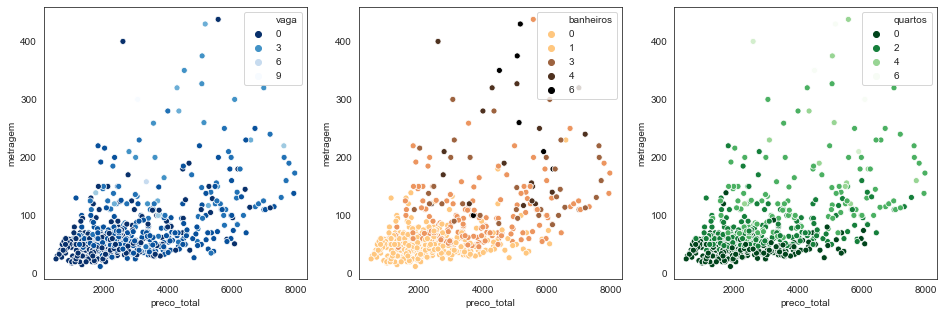

In [213]:
f, ax = plt.subplots(1, 3, figsize=(16,5))

sns.scatterplot(df_quinto['preco_total'], df_quinto['metragem'], hue = df_quinto['vaga'], ax=ax[0], palette='Blues_r')
sns.scatterplot(df_quinto['preco_total'], df_quinto['metragem'], hue = df_quinto['banheiros'], ax=ax[1], palette='copper_r')
sns.scatterplot(df_quinto['preco_total'], df_quinto['metragem'], hue = df_quinto['quartos'], ax=ax[2], palette='Greens_r')

plt.show()

<Figure size 432x432 with 0 Axes>

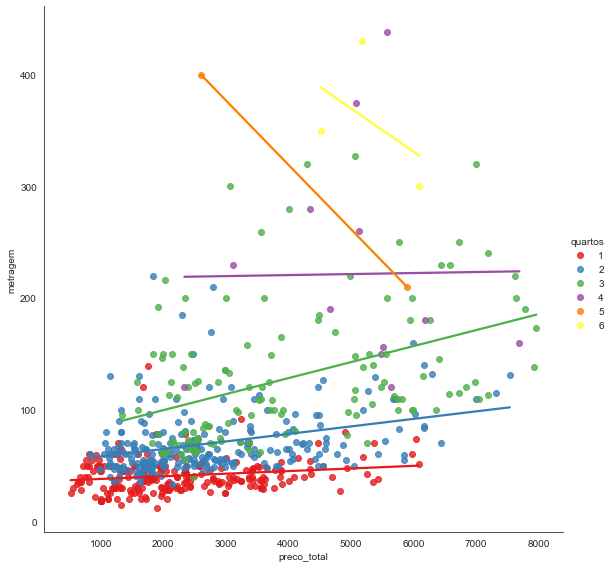

In [214]:
plt.figure(figsize=(6,6))
sns.lmplot('preco_total', 'metragem', data=df_quinto,hue='quartos', ci=False,palette="Set1", height=8);
plt.show()

#  ENTORNO - QUINTO ANDAR

##  DATA

In [266]:
X = df_quinto[['metragem','quartos','banheiros','vaga','lugares_alimentacao','lugares_servicos','lugares_saude','lugares_parques']]
y = df_quinto['preco_total']
X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Linear regression 

In [267]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
predictions_linear = linear_reg.predict(X_test)
rmse_modelo(linear_reg, predictions_linear, X_train,y_test,y_train )

Erro treino:  1093.4662830038149
Erro teste:  1085.434058743403
Score:  0.455623656288068


## DecisionTreeRegressor  

In [268]:
decision_tree_reg = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)
decision_tree_reg.fit(X_train, y_train)
predictions_tree = decision_tree_reg.predict(X_test)
rmse_modelo(decision_tree_reg, predictions_tree, X_train,y_test,y_train )

Erro treino:  1086.2786437895884
Erro teste:  1172.3057605602614
Score:  0.3649993746768795


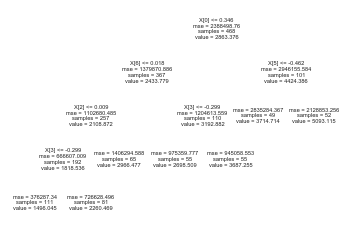

In [220]:
plot_tree(decision_tree_reg);

## Support-vector-regressor

In [269]:
support_vector_reg = SVR(kernel='rbf')
support_vector_reg.fit(X_train, y_train)
predictions_svr = support_vector_reg.predict(X_test)
rmse_modelo(support_vector_reg, predictions_svr, X_train,y_test,y_train )

Erro treino:  1654.5810081520876
Erro teste:  1483.3021987369493
Score:  -0.016603582534744366


## K Nearest Regressor

In [270]:
knearest_reg = KNeighborsRegressor(20)
knearest_reg.fit(X_train, y_train)
predictions_knr = knearest_reg.predict(X_test)
rmse_modelo(knearest_reg, predictions_knr, X_train,y_test,y_train )

Erro treino:  1003.0673915854138
Erro teste:  995.2745051357683
Score:  0.5423029496811423


## Random Forest Regressor

In [271]:
rf_reg = RandomForestRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)
rf_reg.fit(X_train, y_train)
predictions_rf = rf_reg.predict(X_test)
rmse_modelo(rf_reg, predictions_rf, X_train,y_test,y_train )

Erro treino:  1100.7439531239124
Erro teste:  1097.7974028332314
Score:  0.443151886308391


##  Stacking Classifier

In [272]:
estimators = [('LR' ,LinearRegression()), ('DT' ,DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1)), ('support_vector',SVR(kernel='rbf')),
             ('KNreg' ,KNeighborsRegressor(20)), ('random_forest', RandomForestRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3))]

stacking = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())


stacking.fit(X_train, y_train)
predictions_stacking = stacking.predict(X_test)

rmse_modelo(stacking, predictions_stacking, X_train,y_test,y_train )

Erro treino:  998.6031173655597
Erro teste:  1009.5162964780537
Score:  0.5291104821351444


##  Light GBM

In [273]:
lgbmr = LGBMRegressor()
lgbmr.fit(X_train, y_train)
predictions_lgbmr = lgbmr.predict(X_test)
rmse_modelo(lgbmr, predictions_lgbmr, X_train,y_test,y_train )

Erro treino:  514.9714319044327
Erro teste:  1049.6725290940117
Score:  0.49090360964349766


# LOFT

## DATA 

In [301]:
df_loft.corr().loc['preco_total']

metragem               0.803595
quartos                0.503484
vaga                   0.587452
preco_total            1.000000
longitude              0.207621
latitude               0.196518
latitude_utm           0.196172
longitude_utm          0.207640
lugares_alimentacao    0.183037
lugares_servicos       0.155845
outros                 0.019793
lugares_comercio       0.057770
lugares_cultura        0.045716
lugares_saude          0.239608
lugares_educacao      -0.032011
lugares_religiosos     0.074101
lugares_parques        0.174431
lugares_estadios       0.065654
lugares_turismo       -0.063725
lugares_metro_trem     0.147095
lugares_transporte    -0.007345
Name: preco_total, dtype: float64

In [312]:
X = df_loft[['metragem','quartos','vaga','lugares_comercio','lugares_alimentacao','lugares_servicos','lugares_saude','lugares_parques','latitude','longitude']]
y = df_loft['preco_total']
X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression

In [315]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
predictions_linear = linear_reg.predict(X_test)
rmse_modelo(linear_reg, predictions_linear, X_train,y_test,y_train )

Erro treino:  487702.9603050831
Erro teste:  391638.8801415494
Score:  0.7461389095308857


## Decision Tree Regression

In [316]:
decision_tree_reg = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)
decision_tree_reg.fit(X_train, y_train)
predictions_tree = decision_tree_reg.predict(X_test)
rmse_modelo(decision_tree_reg, predictions_tree, X_train,y_test,y_train )

Erro treino:  579832.4569998666
Erro teste:  456848.1922920293
Score:  0.6545633902452375


## Support-vector-regressor

In [317]:
support_vector_reg = SVR(kernel='rbf')
support_vector_reg.fit(X_train, y_train)
predictions_svr = support_vector_reg.predict(X_test)
rmse_modelo(support_vector_reg, predictions_svr, X_train,y_test,y_train )

Erro treino:  977275.032939887
Erro teste:  819881.4123072707
Score:  -0.11256814787460523


## K Nearest Regressor

In [318]:
knearest_reg = KNeighborsRegressor(20)
knearest_reg.fit(X_train, y_train)
predictions_knr = knearest_reg.predict(X_test)
rmse_modelo(knearest_reg, predictions_knr, X_train,y_test,y_train )

Erro treino:  436300.1242143347
Erro teste:  368791.2127824433
Score:  0.7748947260215369


## Random Forest Regressor

In [319]:
rf_reg = RandomForestRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)
rf_reg.fit(X_train, y_train)
predictions_rf = rf_reg.predict(X_test)
rmse_modelo(rf_reg, predictions_rf, X_train,y_test,y_train )

Erro treino:  607239.575449278
Erro teste:  486335.73658467014
Score:  0.608531422582501


## Stacking Classifier

In [320]:
estimators = [('LR' ,LinearRegression()), ('DT' ,DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1)), ('support_vector',SVR(kernel='rbf')),
             ('KNreg' ,KNeighborsRegressor(20)), ('random_forest', RandomForestRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3))]

stacking = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())


stacking.fit(X_train, y_train)
predictions_stacking = stacking.predict(X_test)

rmse_modelo(stacking, predictions_stacking, X_train,y_test,y_train )

Erro treino:  410233.42318474245
Erro teste:  354301.4625379223
Score:  0.7922359362459734


## Light GBM

In [321]:
lgbmr = LGBMRegressor()
lgbmr.fit(X_train, y_train)
predictions_lgbmr = lgbmr.predict(X_test)
rmse_modelo(lgbmr, predictions_lgbmr, X_train,y_test,y_train )

Erro treino:  190694.94186277394
Erro teste:  348013.5315983435
Score:  0.7995450419861463


# PLOT POINT

## DATA

In [340]:
#loading api_key
fkey = open('config.txt', 'r')
api_key = fkey.read()


In [339]:
import gmplot

In [347]:
df_google['bairro'].unique()[:10]

array(['Bom Retiro', 'Casa Verde', 'Santa Cecilia',
       'Vila Ester (Zona Norte)', 'Água Branca', 'Rua Prates', 'Perdizes',
       'Campos Elíseos', 'Higienópolis', 'Parque Peruche'], dtype=object)

In [341]:
#quinto andar
mask = (df['latitude_utm'] > 1) & (df['longitude_utm'] >1)
df_plot = df.loc[mask,:]

latitude_quinto = np.array(df_plot['latitude'])
longitude_quinto = np.array(df_plot['longitude'])
preco_quinto = np.array(df_plot['preco_total'])

In [342]:
#loft
latitude_loft = np.array(df_loft['latitude'])
longitude_loft = np.array(df_loft['longitude'])

In [350]:
#bairro condition
mask =((df_google['bairro'] == 'Bela Vista') |
       (df_google['bairro'] == 'Bom Retiro') |       
       (df_google['bairro'] == 'Santa Cecilia') | 
       (df_google['bairro'] == 'Consolação')| 
       (df_google['bairro'] == 'Brás') |
       (df_google['bairro'] == 'Cerqueira César') |
       (df_google['bairro'] == 'Perdizes') |
       (df_google['bairro'] == 'Sé') |
       (df_google['bairro'] == 'Campos Elíseos') |
       (df_google['bairro'] == 'Paraíso') |
       (df_google['bairro'] == 'Liberdade')) 

df_google_plot = df_google.loc[mask,:]

In [353]:
#google
latitude_google = np.array(df_google['lat'])
longitude_google = np.array(df_google['lng'])

## PLOT

In [355]:
gmap = gmplot.GoogleMapPlotter(-23.543340, -46.646122, zoom=13)
#quinto andar
gmap.scatter(latitude_quinto, longitude_quinto, c='blue',marker=False, symbol='o',s=5, ew=5)
#loft
gmap.scatter(latitude_loft, longitude_loft, c='orange',marker=False, symbol='o',s=5, ew=5)

gmap.apikey = api_key
gmap.draw(r"data/mapa-quinto-loft.html")

In [354]:
gmap = gmplot.GoogleMapPlotter(-23.543340, -46.646122, zoom=13)
#quinto andar
gmap.scatter(latitude_quinto, longitude_quinto, c='blue',marker=False, symbol='o',s=5, ew=5)
#loft
gmap.scatter(latitude_loft, longitude_loft, c='orange',marker=False, symbol='o',s=5, ew=5)
#google
gmap.scatter(latitude_google, longitude_google, c='#3E9E44',marker=False, symbol='o',s=5, ew=5)

gmap.apikey = api_key
gmap.draw(r"data/mapa-pontos-gerais.html")

In [76]:
gmap = gmplot.GoogleMapPlotter(-23.543340, -46.646122, zoom=100, map_type='satellite')
#quinto andar
gmap.scatter(latitude_quinto, longitude_quinto, c='blue',marker=False, symbol='o',s=5, ew=1)
#loft
gmap.scatter(latitude_loft, longitude_loft, c='orange',marker=False, symbol='o',s=5, ew=1)

gmap.apikey = api_key
gmap.draw(r"data/mapa-pontos-aproximados.html")

# PONTOS MINHOCAO

In [360]:
mask = df_loft['logradouro'] == 'Rego Freitas'
df_loft.loc[mask,:]

,tipo_imovel,logradouro,bairro,numero,metragem,quartos,vaga,preco_total,longitude,latitude,...,lugares_comercio,lugares_cultura,lugares_saude,lugares_educacao,lugares_religiosos,lugares_parques,lugares_estadios,lugares_turismo,lugares_metro_trem,lugares_transporte
139,apartamento,Rego Freitas,República,501,56,1,0,449000.0,-46.646608,-23.544739,...,345.0,243.0,31.0,349.0,117.0,1,0.0,537.0,1,0.0
1404,apartamento,Rego Freitas,República,507,40,1,0,220000.0,-46.646607,-23.545945,...,386.0,244.0,31.0,351.0,105.0,1,0.0,537.0,1,0.0
1774,apartamento,Rego Freitas,República,8E,73,3,0,450000.0,-46.646863,-23.546615,...,380.0,243.0,31.0,278.0,101.0,1,0.0,630.0,1,0.0


In [361]:
mask = df_loft['logradouro'] == 'Marquês de Itu'
df_loft.loc[mask,:]

,tipo_imovel,logradouro,bairro,numero,metragem,quartos,vaga,preco_total,longitude,latitude,...,lugares_comercio,lugares_cultura,lugares_saude,lugares_educacao,lugares_religiosos,lugares_parques,lugares_estadios,lugares_turismo,lugares_metro_trem,lugares_transporte
81,apartamento,Marquês de Itu,República,141,37,1,1,300000.0,-46.646166,-23.544086,...,346.0,246.0,25.0,364.0,108.0,1,0.0,626.0,1,0.0


## LOFT

In [383]:
df_loft_simulacao = df_loft.iloc[[139, 1404, 1774, 81],:]

In [470]:
df_loft_simulacao['lugares_parques'] = 100

<ipython-input-470-33641701ebc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loft_simulacao['lugares_parques'] = 100


In [459]:
#df_loft_simulacao.reset_index(inplace=True)

In [461]:
df_loft2 = df_loft
df_loft2 = df_loft2.drop(index=[139,1404,1774,81])

In [472]:
X_predict = df_loft_simulacao[['metragem','quartos','vaga','lugares_comercio','lugares_alimentacao','lugares_servicos','lugares_saude','lugares_parques','latitude','longitude']]

In [473]:
X = df_loft2[['metragem','quartos','vaga','lugares_comercio','lugares_alimentacao','lugares_servicos','lugares_saude','lugares_parques','latitude','longitude']]
y = df_loft2['preco_total']


scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_predict = scaler.transform(X_predict)

In [474]:
knearest_reg = KNeighborsRegressor(20)
knearest_reg.fit(X, y)
predictions_knr = knearest_reg.predict(X_predict)


In [475]:
predictions_knr

array([333650. , 334150. , 531248.5, 326150. ])

## QUINTO ANDAR 

In [479]:
mask = df_quinto['logradouro'] == 'Rua Amaral Gurgel'
df_quinto.loc[mask,:]

,tipo_imovel,logradouro,bairro,numero,metragem,quartos,banheiros,vaga,preco_total,longitude,...,lugares_comercio,lugares_cultura,lugares_saude,lugares_religiosos,lugares_parques,lugares_estadios,lugares_educacao,lugares_metro_trem,lugares_turismo,lugares_transporte
541,apartamento,Rua Amaral Gurgel,Santa Cecília,481.0,43,1,1,0.0,2330,-46.647674,...,410.0,250.0,93.0,127.0,253,0.0,405.0,401,600.0,0.0


In [481]:
mask = df_quinto['logradouro'] == 'Rua Doutor Cesário Mota Júnior'
df_quinto.loc[mask,:]

,tipo_imovel,logradouro,bairro,numero,metragem,quartos,banheiros,vaga,preco_total,longitude,...,lugares_comercio,lugares_cultura,lugares_saude,lugares_religiosos,lugares_parques,lugares_estadios,lugares_educacao,lugares_metro_trem,lugares_turismo,lugares_transporte
536,apartamento,Rua Doutor Cesário Mota Júnior,Santa Cecília,284.0,40,1,1,0.0,2215,-46.649030,...,278.0,245.0,151.0,139.0,253,0.0,396.0,401,600.0,0.0
627,apartamento,Rua Doutor Cesário Mota Júnior,Santa Cecília,476.0,58,1,1,0.0,2212,-46.649263,...,290.0,247.0,151.0,118.0,253,0.0,383.0,401,600.0,0.0
628,apartamento,Rua Doutor Cesário Mota Júnior,Santa Cecília,476.0,73,2,1,1.0,2480,-46.649263,...,290.0,247.0,151.0,118.0,253,0.0,383.0,401,600.0,0.0


In [482]:
mask = df_quinto['logradouro'] == 'Rua Major Sertório'
df_quinto.loc[mask,:]

,tipo_imovel,logradouro,bairro,numero,metragem,quartos,banheiros,vaga,preco_total,longitude,...,lugares_comercio,lugares_cultura,lugares_saude,lugares_religiosos,lugares_parques,lugares_estadios,lugares_educacao,lugares_metro_trem,lugares_turismo,lugares_transporte
270,apartamento,Rua Major Sertório,Santa Cecília,440.0,53,1,2,0.0,2617,-46.648401,...,452.0,255.0,93.0,121.0,253,0.0,403.0,401,600.0,0.0


In [483]:
mask = df_quinto['logradouro'] == 'Rua Rêgo Freitas'
df_quinto.loc[mask,:]

,tipo_imovel,logradouro,bairro,numero,metragem,quartos,banheiros,vaga,preco_total,longitude,...,lugares_comercio,lugares_cultura,lugares_saude,lugares_religiosos,lugares_parques,lugares_estadios,lugares_educacao,lugares_metro_trem,lugares_turismo,lugares_transporte
543,apartamento,Rua Rêgo Freitas,Santa Cecília,354.0,20,1,1,0.0,2065,-46.646722,...,446.0,248.0,87.0,138.0,253,0.0,476.0,401,600.0,0.0


In [514]:
df_quinto_simulacao_q = df_quinto.loc[[541,627,543,270],:]
df_quinto_simulacao_q.head()

,tipo_imovel,logradouro,bairro,numero,metragem,quartos,banheiros,vaga,preco_total,longitude,...,lugares_comercio,lugares_cultura,lugares_saude,lugares_religiosos,lugares_parques,lugares_estadios,lugares_educacao,lugares_metro_trem,lugares_turismo,lugares_transporte
541,apartamento,Rua Amaral Gurgel,Santa Cecília,481.0,43,1,1,0.0,2330,-46.647674,...,410.0,250.0,93.0,127.0,253,0.0,405.0,401,600.0,0.0
627,apartamento,Rua Doutor Cesário Mota Júnior,Santa Cecília,476.0,58,1,1,0.0,2212,-46.649263,...,290.0,247.0,151.0,118.0,253,0.0,383.0,401,600.0,0.0
543,apartamento,Rua Rêgo Freitas,Santa Cecília,354.0,20,1,1,0.0,2065,-46.646722,...,446.0,248.0,87.0,138.0,253,0.0,476.0,401,600.0,0.0
270,apartamento,Rua Major Sertório,Santa Cecília,440.0,53,1,2,0.0,2617,-46.648401,...,452.0,255.0,93.0,121.0,253,0.0,403.0,401,600.0,0.0


In [516]:
df_quinto_simulacao_q['lugares_parques'] = 100

In [517]:
df_quinto2 = df_quinto
df_quinto2 = df_quinto2.drop(index=[541,627,543,270])

In [518]:
X_predict = df_quinto_simulacao_q[['metragem','quartos','banheiros','vaga','lugares_alimentacao','lugares_servicos','lugares_saude','lugares_parques']]
X_predict

,metragem,quartos,banheiros,vaga,lugares_alimentacao,lugares_servicos,lugares_saude,lugares_parques
541,43,1,1,0.0,328.0,147.0,93.0,100
627,58,1,1,0.0,318.0,136.0,151.0,100
543,20,1,1,0.0,292.0,146.0,87.0,100
270,53,1,2,0.0,308.0,149.0,93.0,100


In [519]:
X = df_quinto2[['metragem','quartos','banheiros','vaga','lugares_alimentacao','lugares_servicos','lugares_saude','lugares_parques']]
y = df_quinto2['preco_total']

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_predict = scaler.transform(X_predict)

In [520]:
knearest_reg = KNeighborsRegressor(20)
knearest_reg.fit(X, y)
predictions_knr = knearest_reg.predict(X_predict)
predictions_knr

array([2643.15, 2579.4 , 2408.4 , 2605.65])

# SIMILARIDADES

In [546]:
X = df_quinto[['metragem','quartos','banheiros','vaga','lugares_alimentacao','lugares_servicos','lugares_saude','lugares_parques']]
y = df_quinto['preco_total']


scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


In [552]:
knearest_reg = KNeighborsRegressor(20)
knearest_reg.fit(X, y)
predictions_knr = knearest_reg.predict(X)

In [553]:
A = knearest_reg.kneighbors_graph().toarray()

In [554]:
distancias = 1 / (1 + squareform(pdist(A)))
distancias

array([[1.        , 0.28989795, 0.21089672, ..., 0.13652706, 0.13652706,
        0.13652706],
       [0.28989795, 1.        , 0.22400924, ..., 0.13652706, 0.13652706,
        0.13652706],
       [0.21089672, 0.22400924, 1.        , ..., 0.13652706, 0.13652706,
        0.13652706],
       ...,
       [0.13652706, 0.13652706, 0.13652706, ..., 1.        , 0.13652706,
        0.13652706],
       [0.13652706, 0.13652706, 0.13652706, ..., 0.13652706, 1.        ,
        0.13652706],
       [0.13652706, 0.13652706, 0.13652706, ..., 0.13652706, 0.13652706,
        1.        ]])

In [555]:
df_distancias_matrix = pd.DataFrame(distancias)

In [556]:
len(df_distancias_matrix.columns)

625

In [557]:
len(df_distancias_matrix.columns)

625

In [558]:
lista_comparacao = []
for coluna in range(len(df_distancias_matrix.columns)):
    linha = 0
    for row in df_distancias_matrix.loc[:,coluna]:
        itens = (coluna , linha , row)
        lista_comparacao.append(itens)
        linha += 1

In [559]:
df_distancias = pd.DataFrame(lista_comparacao, columns=['ap1','ap2','distancia'])

In [565]:
df_distancias = df_distancias.loc[(df_distancias['distancia'] < 1),:]

In [571]:
df_distancias.sort_values('distancia',ascending=False).head(10)

,ap1,ap2,distancia
195313,312,313,0.414214
321865,514,615,0.414214
219260,350,510,0.414214
216694,346,444,0.414214
211683,338,433,0.414214
208451,333,326,0.414214
204083,326,333,0.414214
1255,2,5,0.414214
202190,323,315,0.414214
202152,323,277,0.414214


In [578]:
df_quinto.loc[[514,615],:]

,tipo_imovel,logradouro,bairro,numero,metragem,quartos,banheiros,vaga,preco_total,longitude,...,lugares_comercio,lugares_cultura,lugares_saude,lugares_religiosos,lugares_parques,lugares_estadios,lugares_educacao,lugares_metro_trem,lugares_turismo,lugares_transporte
514,apartamento,Alameda Franca,Jardim Paulista,1645.0,40,1,1,1.0,3423,-46.667716,...,170.0,166.0,162.0,31.0,253,0.0,69.0,401,174.0,0.0
615,apartamento,Rua Rodovalho da Fonseca,Pari,343.0,65,2,2,1.0,3450,-46.609282,...,6.0,0.0,12.0,29.0,253,148.0,36.0,401,0.0,0.0


In [576]:
df_quinto.loc[[350,510],:]

,tipo_imovel,logradouro,bairro,numero,metragem,quartos,banheiros,vaga,preco_total,longitude,...,lugares_comercio,lugares_cultura,lugares_saude,lugares_religiosos,lugares_parques,lugares_estadios,lugares_educacao,lugares_metro_trem,lugares_turismo,lugares_transporte
350,apartamento,Rua Campos Sales,Brás,147.0,78,2,1,1.0,2650,-46.619122,...,86.0,140.0,10.0,61.0,253,0.0,0.0,401,183.0,6.0
510,apartamento,Rua Herculano de Freitas,Consolação,249.0,40,1,1,1.0,2413,-46.653807,...,296.0,367.0,267.0,81.0,253,0.0,154.0,401,180.0,84.0


In [574]:
df_quinto.loc[[323,277],:]

,tipo_imovel,logradouro,bairro,numero,metragem,quartos,banheiros,vaga,preco_total,longitude,...,lugares_comercio,lugares_cultura,lugares_saude,lugares_religiosos,lugares_parques,lugares_estadios,lugares_educacao,lugares_metro_trem,lugares_turismo,lugares_transporte
323,apartamento,Rua Cayowaá,Sumaré,2046.0,110,3,3,2.0,5814,-46.688550,...,16.0,26.0,38.0,41.0,253,0.0,0.0,401,0.0,5.0
277,apartamento,Alameda Itu,Jardim Paulista,1030.0,115,2,2,1.0,7320,-46.662372,...,317.0,393.0,159.0,47.0,253,0.0,156.0,401,275.0,0.0


In [573]:
df_quinto.loc[[323,315],:]

,tipo_imovel,logradouro,bairro,numero,metragem,quartos,banheiros,vaga,preco_total,longitude,...,lugares_comercio,lugares_cultura,lugares_saude,lugares_religiosos,lugares_parques,lugares_estadios,lugares_educacao,lugares_metro_trem,lugares_turismo,lugares_transporte
323,apartamento,Rua Cayowaá,Sumaré,2046.0,110,3,3,2.0,5814,-46.68855,...,16.0,26.0,38.0,41.0,253,0.0,0.0,401,0.0,5.0
315,casa,Rua Carmine Forte,Bom Retiro,39.0,150,3,2,0.0,2135,-46.63876,...,94.0,291.0,13.0,120.0,253,3.0,0.0,401,0.0,0.0


In [568]:
df_quinto.loc[[350,510 ],:]

,tipo_imovel,logradouro,bairro,numero,metragem,quartos,banheiros,vaga,preco_total,longitude,...,lugares_comercio,lugares_cultura,lugares_saude,lugares_religiosos,lugares_parques,lugares_estadios,lugares_educacao,lugares_metro_trem,lugares_turismo,lugares_transporte
350,apartamento,Rua Campos Sales,Brás,147.0,78,2,1,1.0,2650,-46.619122,...,86.0,140.0,10.0,61.0,253,0.0,0.0,401,183.0,6.0
510,apartamento,Rua Herculano de Freitas,Consolação,249.0,40,1,1,1.0,2413,-46.653807,...,296.0,367.0,267.0,81.0,253,0.0,154.0,401,180.0,84.0


In [594]:
df_plot = df_plot.drop_duplicates()

In [ ]:
'lugares_alimentacao','lugares_servicos','lugares_saude','lugares_parques'

In [600]:
df_plot = df_plot[['tipo_imovel', 'logradouro', 'bairro', 'numero', 'metragem', 'quartos','banheiros', 'vaga', 'preco_total','lugares_alimentacao','lugares_servicos','lugares_saude','lugares_parques']]


In [603]:
df_plot =df_plot.rename(columns={'lugares_alimentacao':'alimentacao', 'lugares_servicos':'servicos','lugares_saude':'saude','lugares_parques':'parques' })

In [604]:
df_plot

,tipo_imovel,logradouro,bairro,numero,metragem,quartos,banheiros,vaga,preco_total,alimentacao,servicos,saude,parques
514,apartamento,Alameda Franca,Jardim Paulista,1645,40,1,1,1,3423,205.0,66.0,162.0,44.0
615,apartamento,Rua Rodovalho da Fonseca,Pari,343,65,2,2,1,3450,18.0,34.0,12.0,21.0
350,apartamento,Rua Campos Sales,Brás,147,78,2,1,1,2650,29.0,30.0,10.0,27.0
510,apartamento,Rua Herculano de Freitas,Consolação,249,40,1,1,1,2413,264.0,134.0,267.0,95.0
323,apartamento,Rua Cayowaá,Sumaré,2046,110,3,3,2,5814,87.0,36.0,38.0,63.0
277,apartamento,Alameda Itu,Jardim Paulista,1030,115,2,2,1,7320,236.0,122.0,159.0,86.0
315,casa,Rua Carmine Forte,Bom Retiro,39,150,3,2,0,2135,138.0,88.0,13.0,23.0


In [597]:
df_plot.columns

Index(['tipo_imovel', 'logradouro', 'bairro', 'numero', 'metragem', 'quartos',
       'banheiros', 'vaga', 'preco_total', 'longitude', 'latitude', 'ruas',
       'latitude_utm', 'longitude_utm', 'latitude_utm.1', 'longitude_utm.1',
       'lugares_alimentacao', 'outros', 'lugares_servicos', 'lugares_comercio',
       'lugares_cultura', 'lugares_saude', 'lugares_religiosos',
       'lugares_parques', 'lugares_estadios', 'lugares_educacao',
       'lugares_metro_trem', 'lugares_turismo', 'lugares_transporte'],
      dtype='object')

In [588]:
def to_float(row):
    return int(row)

In [591]:
df_plot['numero'] = df_plot['numero'].apply(to_float)
df_plot['vaga'] = df_plot['vaga'].apply(to_float)
df_plot['vaga'] = df_plot['vaga'].apply(to_float)




In [583]:
#quinto andar
lista_index_semelhantes = [514,615,350,510,323,277,323,315]
df_plot = df.loc[lista_index_semelhantes,:]

latitude_quinto = np.array(df_plot['latitude'])
longitude_quinto = np.array(df_plot['longitude'])

In [584]:
gmap = gmplot.GoogleMapPlotter(-23.543340, -46.646122, zoom=13)
#quinto andar
gmap.scatter(latitude_quinto, longitude_quinto, c='blue',marker=False, symbol='o',s=5, ew=5)

gmap.apikey = api_key
gmap.draw(r"data/similar.html")